# **PCA (Principal Component Analysis)**

PCA (Principal Component Analysis) is primarily used to reduce the `dimensionality` of large datasets by extracting the most important features, allowing for easier visualization and analysis of complex data, especially when dealing with high-dimensional information, while still preserving the key patterns and relationships within the data.

It's commonly applied in data preprocessing for machine learning tasks like clustering and classification.

1. We select one point of view and on that point of view it divide our data.
   1. Size based (PC1) -> differentiate 90% of data 
   2. Shape based (PC2) -> differentiate 5% of data
   3. And the other PCs are 2.5% , 2%, 0.5% variations and so on.
2. Draw Scree plot -> Right Skewed. As this will tell us that which PCs are variating data more.
3. Why PC1 distance matters alot as compare to PC2?
   1. Because PC1 has 90% variation in data. PC2 has less variation. Other PCs are supporting the PC1 that YES there is difference.
4. You can work wiht `Multivariate Analysis` using PCA.
5. You `MUST SCALE` your Data before implementing PCA.
6. It simplify the data. Easy to visualize.
7. It reduce dimensionality of data.

## Key Terms in PCA

- `Dimensions` -> Features/Columns/Features.
- `Principal Component`
  - 37:00 
- `Covariance Matrix`
  - Variance & Covariance
- `Eigen Vectors`
- `Eigen Values`
- Scree Plot
- Loading Score
- Biplots

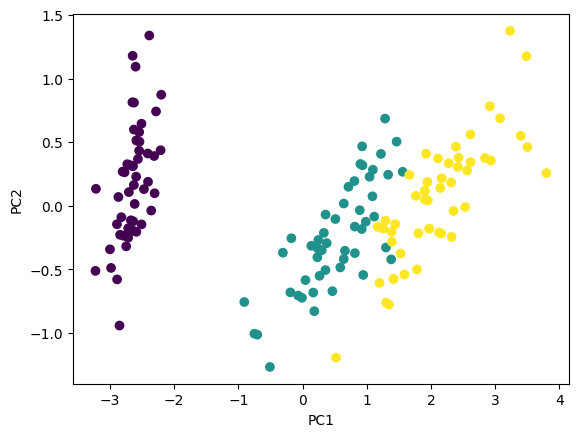

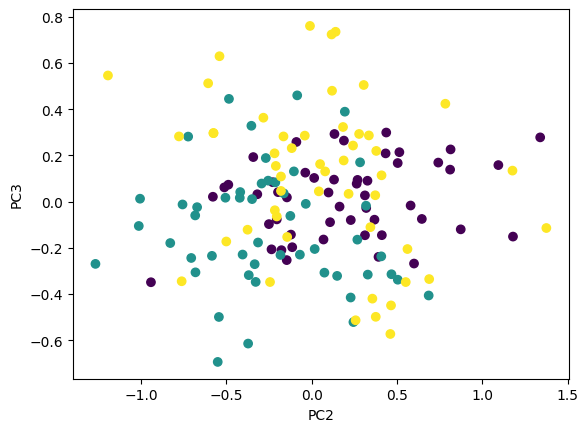

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# load the iris dataset
iris = load_iris()

# Let's say we want to reduce the data to two dimensions
pca = PCA(n_components=3)

# Fit and transform the data
iris_pca = pca.fit_transform(iris.data)

# Now we can plot the first two principal components
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Now we can plot the 2 and 3 principal components
plt.scatter(iris_pca[:,1], iris_pca[:,2], c=iris.target)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

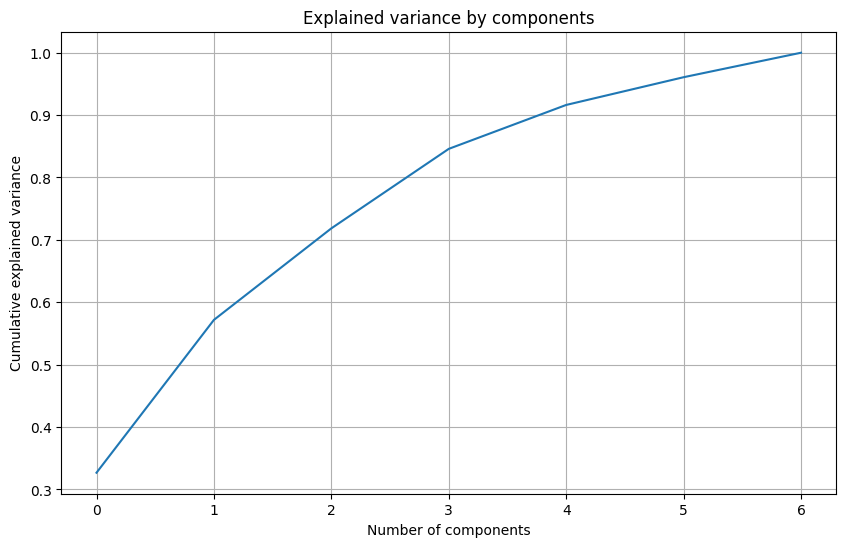

                 PC1       PC2       PC3  ...       PC5       PC6       PC7
total_bill  0.577289  0.133642  0.164816  ... -0.058183  0.378659  0.686390
tip         0.531650  0.178333  0.159316  ... -0.637807 -0.274214 -0.421978
sex         0.189111 -0.152571 -0.588523  ...  0.000506 -0.115541  0.007162
smoker      0.036649 -0.335732  0.724260  ...  0.212334  0.111732 -0.228151
day        -0.156579  0.660434 -0.047053  ...  0.003218  0.606759 -0.340735
time       -0.281249  0.556479  0.266919  ... -0.004329 -0.572115  0.352618
size        0.493317  0.261729 -0.055523  ...  0.738039 -0.245190 -0.241370

[7 rows x 7 columns]


In [2]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# load the data
tips = sns.load_dataset('tips')
 
# preporcessing
# encode categorical data 

le = LabelEncoder()
cat_features = tips.select_dtypes(include='category').columns

for features in cat_features:
    tips[features] = le.fit_transform(tips[features])

# standardize the data
scaler = StandardScaler()
tips_scaled = scaler.fit_transform(tips)

# apply PCA

pca = PCA()
X_pca = pca.fit_transform(tips_scaled)

# plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by components')
plt.grid(True)
plt.show()

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=tips.columns)
print(loadings)

<Axes: xlabel='PC1', ylabel='PC2'>

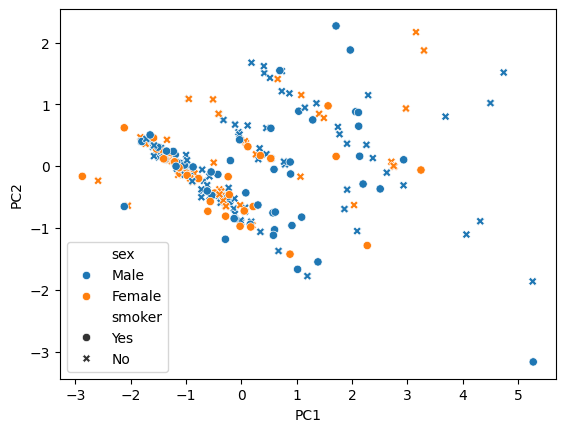

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

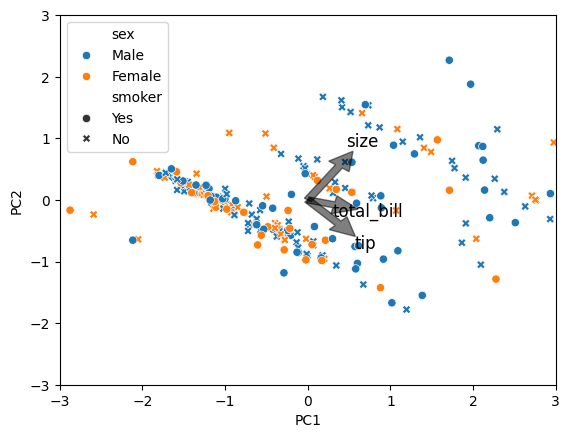

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='black', alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(feature[0]*1.2, feature[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

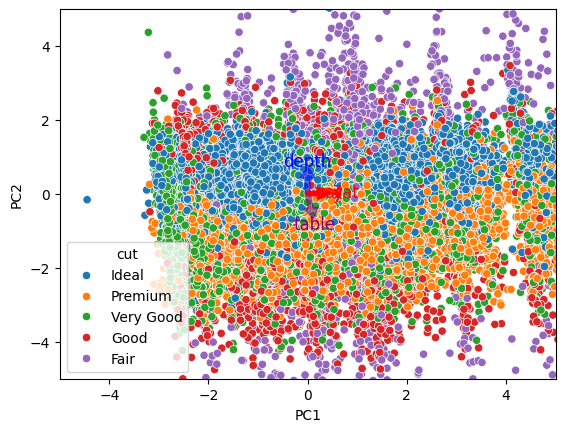

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
diamonds['PC1'] = X_pca[:, 0]
diamonds['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=diamonds, hue='cut')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

            PC1       PC2
carat  0.495367  0.045130
depth -0.000682  0.734082
table  0.120581 -0.669827
x      0.500910  0.008204
y      0.495218  0.009657
z      0.493882  0.101283


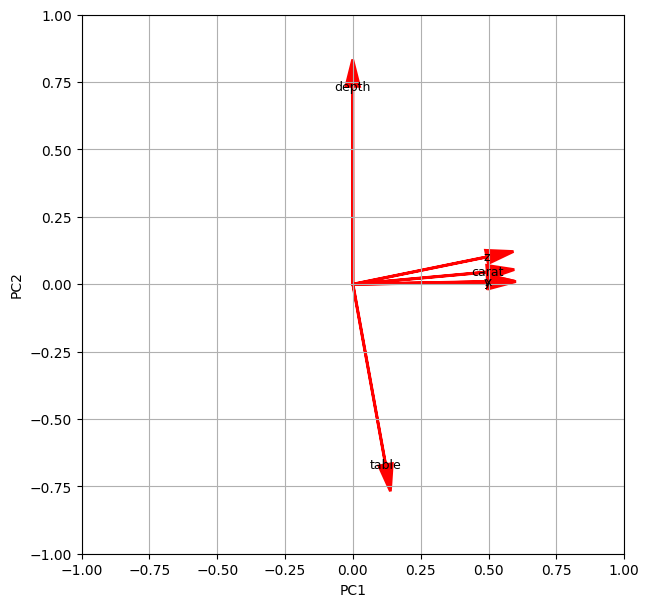

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)

# Add arrows indicating the direction and strength of each original feature in the principal component space
plt.figure(figsize=(7,7))
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, fc='r', ec='r')
    plt.text(v[0], v[1], X.columns[i], color='black', ha='center', va='center', fontsize=9)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.grid()
plt.show()

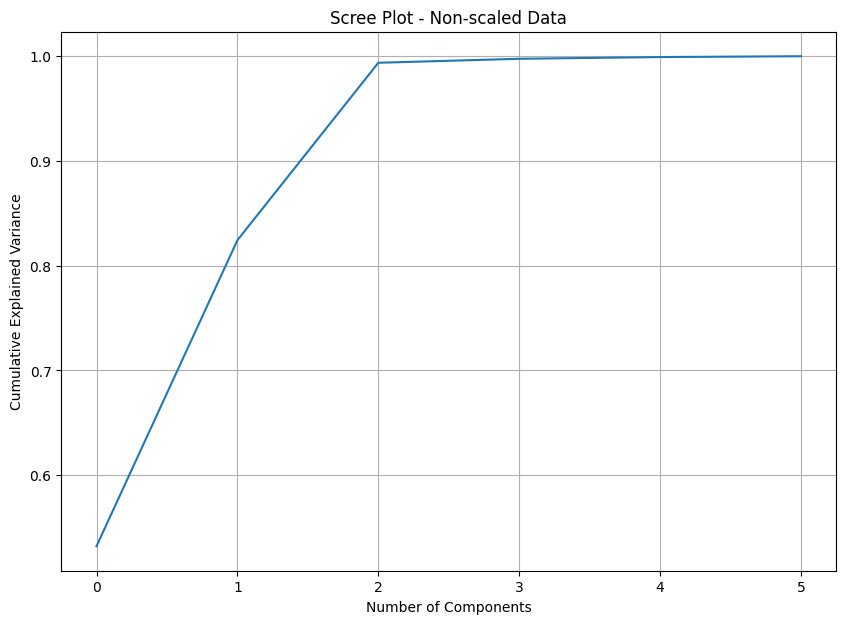

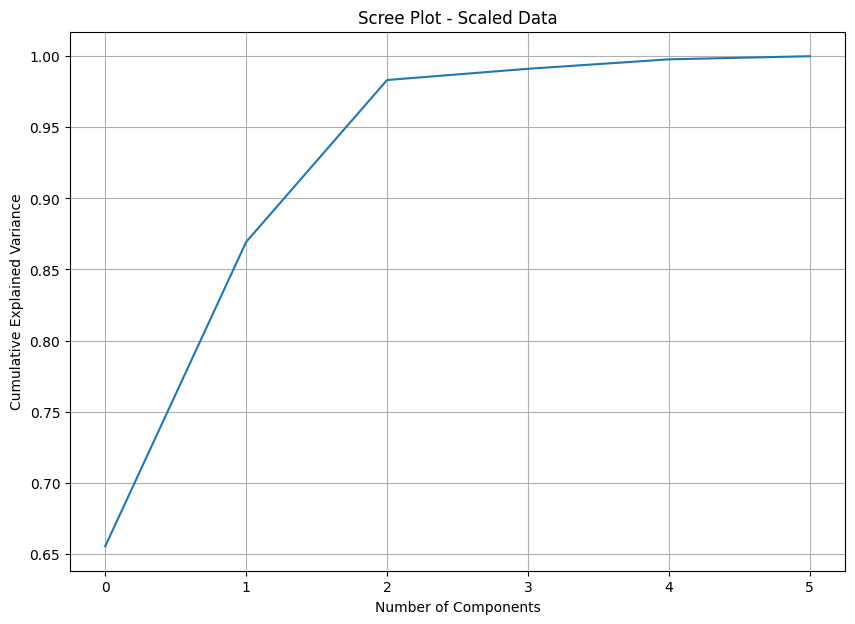

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Perform PCA on non-scaled data
pca_non_scaled = PCA()
pca_non_scaled.fit(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA on scaled data
pca_scaled = PCA()
pca_scaled.fit(X_scaled)

# Plot the explained variance (Scree Plot) for non-scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_non_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Non-scaled Data')
plt.grid(True)
plt.show()

# Plot the explained variance (Scree Plot) for scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Scaled Data')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 2) # Select 3 features
fit = rfe.fit(X, y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assume X is your feature set and y is your target variable
selector = SelectKBest(score_func=chi2, k=4) # k is the number of top features to select
fit = selector.fit(X, y)

# Get the scores for each feature
scores = fit.scores_